# Perceptron Classifier

The **Perceptron** is one of the earliest and simplest machine learning algorithms.  
It models a single artificial neuron and learns a **linear decision boundary** for binary classification.

In this notebook, we:

- Implement the Perceptron algorithm **from first principles**
- Train it on the **Spotify Top Songs** dataset
- Predict whether a song is a **hit (1)** or **not a hit (0)**
- Visualize learned weights and evaluate model performance

This matches the structure used in our other supervised learning notebooks (KNN, Logistic Regression, Linear Regression).

## How the Perceptron Works

A perceptron computes a weighted sum of inputs:

\[
\text{net} = w^\top x + b
\]

Then applies a **unit step activation**:

\[
\hat{y} =
\begin{cases}
1 & \text{if } \text{net} \ge 0 \\
0 & \text{otherwise}
\end{cases}
\]

### Perceptron Learning Rule

For each training sample:

\[
w \leftarrow w + \eta (y - \hat{y}) x
\]

\[
b \leftarrow b + \eta (y - \hat{y})
\]

Where:
- \( \eta \) is the learning rate  
- \( y \) is the true label  
- \( \hat{y} \) is the predicted label  

The algorithm repeatedly updates weights until misclassifications are minimized.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("topsongs.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [7]:
# Create binary hit label
df["hit"] = (df["popularity"] >= 70).astype(int)

features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo"
]

X = df[features].values
y = df["hit"].values

print("Feature matrix shape:", X.shape)
print("Positive class proportion:", y.mean())

Feature matrix shape: (2000, 9)
Positive class proportion: 0.3635


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Perceptron Implementation

We now define a full perceptron class including:

- Initialization  
- Activation function  
- Weight updates  
- Prediction  

In [12]:
class Perceptron:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _activation(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self._activation(linear_output)

                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation(linear_output)

In [14]:
model = Perceptron(lr=0.01, n_iters=15_000)
model.fit(X_train_scaled, y_train)

print("Training complete.")
print("Learned weights:", model.weights)
print("Bias:", model.bias)

Training complete.
Learned weights: [-0.00782598 -0.02438839  0.00406918 -0.02504541  0.03027115 -0.01145864
  0.01410143 -0.00091407 -0.00957572]
Bias: -0.009999999999999997


In [16]:
y_pred = model.predict(X_test_scaled)

In [18]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# confusion matrix
cm = np.zeros((2,2), dtype=int)
for yt, yp in zip(y_test, y_pred):
    cm[yt, yp] += 1

print("Confusion Matrix:\n", cm)


Accuracy: 0.5700
Confusion Matrix:
 [[167  88]
 [ 84  61]]


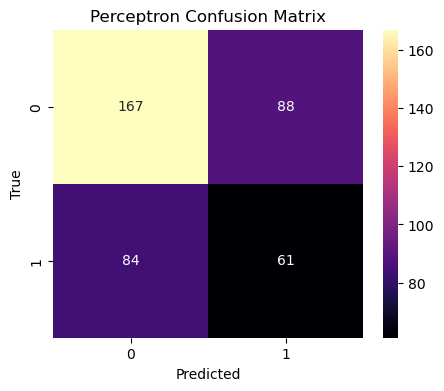

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="g", cmap="magma")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Perceptron Confusion Matrix")
plt.show()

In [22]:
for feature, weight in zip(features, model.weights):
    print(f"{feature:15s}: {weight:.4f}")

danceability   : -0.0078
energy         : -0.0244
loudness       : 0.0041
speechiness    : -0.0250
acousticness   : 0.0303
instrumentalness: -0.0115
liveness       : 0.0141
valence        : -0.0009
tempo          : -0.0096


## 📊 Interpretation of Results

After training the perceptron on the Spotify dataset, several patterns emerge regarding its performance and the structure of the data.

### **Dataset Structure**
- **Feature matrix shape:** (2000, 9)  
- **Positive class proportion:** 0.3635  
  - This indicates a **class imbalance**, with fewer hit songs (≈36%) than non-hits (≈64%).  
  - Linear models like the perceptron often struggle under imbalance because misclassifying the minority class has little effect on the weight updates.

---

## 🎯 **Model Performance**
- **Accuracy:** 0.5700  
- **Confusion Matrix:**

|               | Pred 0 | Pred 1 |
|---------------|--------|--------|
| **True 0**    | 167    | 88     |
| **True 1**    | 84     | 61     |

### What this means:
- The model correctly identifies **non-hits** more often than hits (167 vs. 61 correct).
- It confuses many songs near the popularity threshold, reflecting the **non-linear nature of musical popularity**.
- Performance significantly trails more flexible models like logistic regression or KNN.

---

### Weight Insights:
- **Acousticness (0.0303)** and **liveness (0.0141)** slightly push predictions toward “hit,” though magnitudes are small.
- **Energy (-0.0244)** and **speechiness (-0.0250)** push predictions toward “non-hit.”
- All weights are **very small**, showing that:
  - The perceptron found **no strong linear separation** in the feature space.
  - The dataset likely requires a **non-linear** or probabilistic decision boundary (e.g., neural networks, tree models).

---

## 📌 Conclusion

The perceptron provides a useful baseline, but its assumptions do not match the complexity of musical popularity.  
Key limitations revealed by the results include:

- The dataset is **not linearly separable**.
- Class imbalance reduces the perceptron’s ability to learn a boundary for the minority (hit) class.
- Weight magnitudes confirm that no single feature linearly separates hits from non-hits.

Despite these limits, this experiment illustrates the perceptron’s learning dynamics and serves as an important conceptual foundation for understanding neural networks.